In [2]:
# !pip install imbalanced-learn

In [3]:
!pip install seaborn

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Youssef\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [4]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [5]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
df.describe(include='object')

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


In [9]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [10]:
df.duplicated().sum()

3854

In [11]:
duplicates = df[df.duplicated(keep='first')]
duplicates

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [12]:
#drop the duplicates
df.drop_duplicates(keep='first', inplace=True)

In [13]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [14]:
df.shape

(96146, 9)

In [15]:
df['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [16]:
# drop the rows having the 'other' value.
df = df[df['gender'] != 'Other']

In [17]:
df['gender'].value_counts()

gender
Female    56161
Male      39967
Name: count, dtype: int64

In [18]:
df['hypertension'].value_counts()

hypertension
0    88667
1     7461
Name: count, dtype: int64

In [19]:
df['heart_disease'].value_counts()

heart_disease
0    92205
1     3923
Name: count, dtype: int64

In [20]:
df['smoking_history'].value_counts()

smoking_history
never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: count, dtype: int64

In [21]:
#combine former, current,not current, and ever into a column named smoked
df['smoking_history'] = df['smoking_history'].replace({
    'never': 'never',
    'No Info': 'No Info',
    'former': 'smoked',
    'current': 'smoked',
    'not current': 'smoked',
    'ever': 'smoked'
})

C:\Users\Youssef\AppData\Local\Temp\ipykernel_3784\3186402223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_history'] = df['smoking_history'].replace({


In [22]:
df['smoking_history'].value_counts()

smoking_history
never      34395
No Info    32881
smoked     28852
Name: count, dtype: int64

In [23]:
df['diabetes'].value_counts()

diabetes
0    87646
1     8482
Name: count, dtype: int64

In [24]:
# there is an imbalance problem.
# could be solved using the SMOTE technique or the ''class_weight=balanced'' paramater in the ML models.
df['diabetes'].value_counts(normalize=True)

diabetes
0    0.911763
1    0.088237
Name: proportion, dtype: float64

In [25]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,smoked,23.45,5.0,155,0
4,Male,76.0,1,1,smoked,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,smoked,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [25]:
from imblearn.over_sampling import SMOTE

<Axes: xlabel='blood_glucose_level', ylabel='Count'>

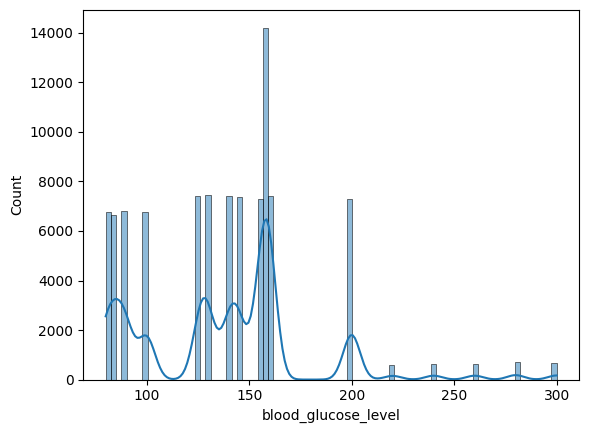

In [26]:
#visualizing the distribution of the blood glucose level
sns.histplot(df['blood_glucose_level'], kde=True)

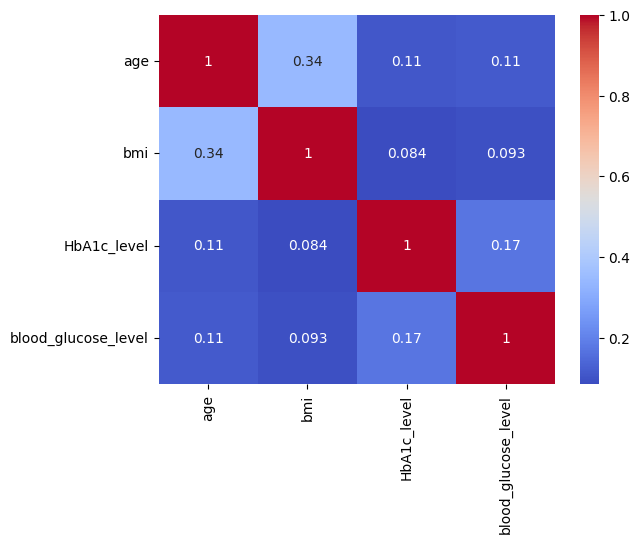

In [27]:
# Visualizing the correlation between the numeric columns
corr = df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

<Axes: xlabel='gender', ylabel='count'>

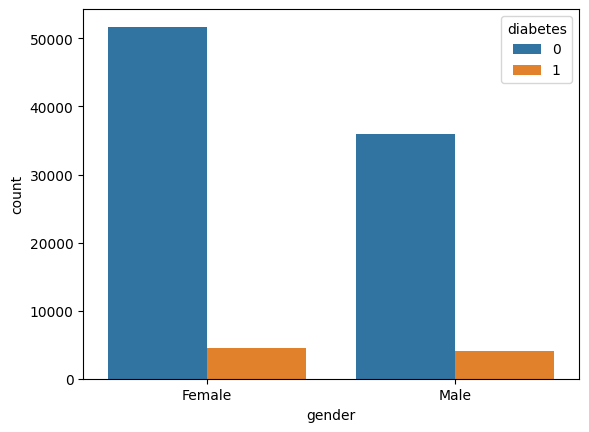

In [28]:
#visualizing the count of the values of the gender feature
sns.countplot(x='gender', hue='diabetes', data=df)

Checking for Outliers

In [29]:
# Define a function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    print(f"🔍 {column}:")
    print(f" - Q1 = {Q1}")
    print(f" - Q3 = {Q3}")
    print(f" - IQR = {IQR}")
    print(f" - Lower bound = {lower_bound}")
    print(f" - Upper bound = {upper_bound}")
    print(f" - Number of outliers = {len(outliers)}")
    return outliers

# Detect outliers
outliers_age = detect_outliers_iqr(df, 'age')
outliers_bmi = detect_outliers_iqr(df, 'bmi')


🔍 age:
 - Q1 = 24.0
 - Q3 = 59.0
 - IQR = 35.0
 - Lower bound = -28.5
 - Upper bound = 111.5
 - Number of outliers = 0
🔍 bmi:
 - Q1 = 23.4
 - Q3 = 29.86
 - IQR = 6.460000000000001
 - Lower bound = 13.709999999999997
 - Upper bound = 39.55
 - Number of outliers = 5354


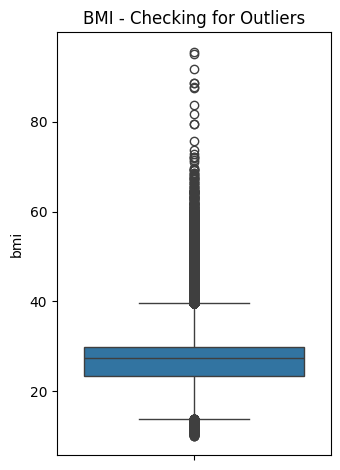

In [30]:
plt.subplot(1,2,2)
sns.boxplot(y=df['bmi'])
plt.title("BMI - Checking for Outliers")

plt.tight_layout()
plt.show()

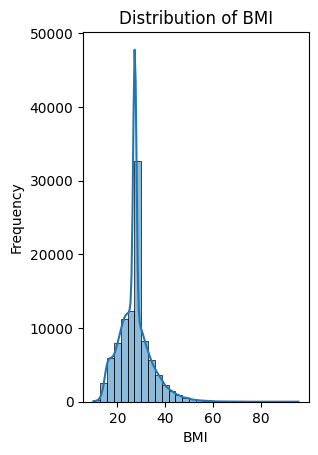

In [31]:
plt.subplot(1,2,2)
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

#The bmi is right-skewed (long tail to the right).

In [32]:
df['bmi'].describe()


count    96128.000000
mean        27.321450
std          6.767811
min         10.010000
25%         23.400000
50%         27.320000
75%         29.860000
max         95.690000
Name: bmi, dtype: float64

In [33]:
# Apply log transformation (adding 1 in case there are 0 values)
df['bmi_log'] = np.log1p(df['bmi'])

C:\Users\Youssef\AppData\Local\Temp\ipykernel_3784\3496729389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi_log'] = np.log1p(df['bmi'])


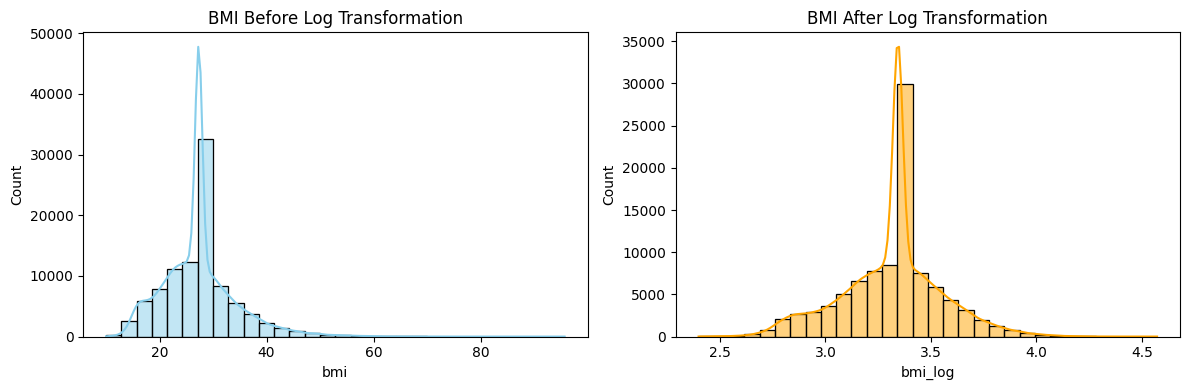

In [34]:
# Compare before vs after
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(df['bmi'], bins=30, ax=axes[0], kde=True, color='skyblue')
axes[0].set_title("BMI Before Log Transformation")

sns.histplot(df['bmi_log'], bins=30, ax=axes[1], kde=True, color='orange')
axes[1].set_title("BMI After Log Transformation")

plt.tight_layout()
plt.show()

Just remember to interpret model results on the original scale if needed by applying np.expm1() to reverse it.

In [35]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'bmi_log'],
      dtype='object')

Encode Categorical Columns


In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
categorical_cols = ['gender', 'smoking_history']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


C:\Users\Youssef\AppData\Local\Temp\ipykernel_3784\1999832282.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
C:\Users\Youssef\AppData\Local\Temp\ipykernel_3784\1999832282.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])


In [38]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_log
0,0,80.0,0,1,1,25.19,6.6,140,0,3.265378
1,0,54.0,0,0,0,27.32,6.6,80,0,3.343568
2,1,28.0,0,0,1,27.32,5.7,158,0,3.343568
3,0,36.0,0,0,2,23.45,5.0,155,0,3.196630
4,1,76.0,1,1,2,20.14,4.8,155,0,3.051167


Apply Standardization/Scaling.

first, divide into X and y to avoid data leakage problem when scaling during splitting into train and test sets.

In [39]:
X = df.drop(['diabetes', 'bmi'], axis=1) # try or use bmi_log feature instead.
y = df['diabetes']

In [40]:
# Split into train/test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [42]:
num_features = ['age', 'bmi_log', 'blood_glucose_level', 'HbA1c_level']


In [43]:
# Fit on train, transform both
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [44]:
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (76902, 8)
Test data shape: (19226, 8)


In [45]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,HbA1c_level,blood_glucose_level,bmi_log
12312,0,-0.879517,0,0,1,0.528048,-0.935198,-0.391063
51981,0,1.210443,0,1,2,3.231685,2.978520,0.286677
62671,1,-0.479312,0,0,1,0.994193,1.510876,-1.020672
33823,1,0.765771,0,0,1,2.485854,0.532446,0.095789
44586,0,-0.790582,0,0,1,0.621277,0.043232,-0.648051


# Model Selection:

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [47]:
# defining all the models
models = {
    "Logistic Regression\n": LogisticRegression(max_iter=1000),
    "Random Forest\n": RandomForestClassifier(random_state=42),
    "Decision Tree\n": DecisionTreeClassifier(random_state=42),
    "KNN\n": KNeighborsClassifier(),
    "SVM\n": SVC(),
    "Gradient Boosting\n": GradientBoostingClassifier(random_state=42)
}

In [48]:
# evaluating the models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
# calculating the metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1
    })

    # printing the metrics
    print(f"\n{name} Performance:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # the confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Logistic Regression
 Performance:
Accuracy: 0.9583
Precision: 0.8549
Recall: 0.6356
F1 Score: 0.7291
Confusion Matrix:
[[17347   183]
 [  618  1078]]

Random Forest
 Performance:
Accuracy: 0.9692
Precision: 0.9346
Recall: 0.6993
F1 Score: 0.8000
Confusion Matrix:
[[17447    83]
 [  510  1186]]

Decision Tree
 Performance:
Accuracy: 0.9493
Precision: 0.6995
Recall: 0.7453
F1 Score: 0.7217
Confusion Matrix:
[[16987   543]
 [  432  1264]]

KNN
 Performance:
Accuracy: 0.9602
Precision: 0.8799
Recall: 0.6350
F1 Score: 0.7377
Confusion Matrix:
[[17383   147]
 [  619  1077]]

SVM
 Performance:
Accuracy: 0.9653
Precision: 0.9914
Recall: 0.6114
F1 Score: 0.7564
Confusion Matrix:
[[17521     9]
 [  659  1037]]

Gradient Boosting
 Performance:
Accuracy: 0.9714
Precision: 0.9783
Recall: 0.6916
F1 Score: 0.8104
Confusion Matrix:
[[17504    26]
 [  523  1173]]


In [49]:
# comparing the models based on F1 (cuz data is imbalanced)
results_df = pd.DataFrame(results).sort_values(by="F1", ascending=False)
print("overall model comparison:")
print(results_df.to_string(index=False))

overall model comparison:
                Model  Accuracy  Precision   Recall       F1
  Gradient Boosting\n  0.971445   0.978315 0.691627 0.810363
      Random Forest\n  0.969156   0.934594 0.699292 0.800000
                SVM\n  0.965255   0.991396 0.611439 0.756382
                KNN\n  0.960158   0.879902 0.635024 0.737671
Logistic Regression\n  0.958338   0.854877 0.635613 0.729117
      Decision Tree\n  0.949287   0.699502 0.745283 0.721667


# Model Training

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# 1. Define the base model
# Using random_state ensures reproducibility
gb_model = GradientBoostingClassifier(random_state=42)

# 2. Define the hyperparameter grid for search
# Focus on parameters that affect the performance and power of Gradient Boosting
param_grid = {
    'n_estimators': [300, 400],         # Number of boosting stages (trees)
    'learning_rate': [0.08, 0.12, 0.15],     # Learning rate (most sensitive parameter)
    'max_depth': [2, 3],               # Maximum depth of the individual estimators (controls complexity)
    'subsample': [0.7, 0.8, 0.9]             # Fraction of samples used for fitting each base learner (reduces overfitting)
}

# 3. Setup the Grid Search tool
# scoring='f1' ensures optimization for F1 score — best for imbalanced data
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    scoring='f1',
    cv=3,                   # 3-Fold Cross-Validation
    verbose=2,
    n_jobs=-1               # Use all CPU cores
)

# 4. Start training and searching on X_train and y_train
print("Starting Grid Search for best Gradient Boosting parameters...")
grid_search.fit(X_train, y_train)

# 5. Display the best results and parameters
print("\n=============================================")
print("Best F1 score achieved (during validation):", grid_search.best_score_)
print("Best hyperparameter combination:")
print(grid_search.best_params_)
print("=============================================\n")

# Retrieve the best trained model
best_gb_model = grid_search.best_estimator_




Starting Grid Search for best Gradient Boosting parameters...
Fitting 3 folds for each of 36 candidates, totalling 108 fits

Best F1 score achieved (during validation): 0.8068743731562978
Best hyperparameter combination:
{'learning_rate': 0.12, 'max_depth': 2, 'n_estimators': 300, 'subsample': 0.8}



In [51]:
# Use the best parameters from the previous step
best_params = grid_search.best_params_

# Setup the final model with early stopping enabled
final_gb_model = GradientBoostingClassifier(
    n_estimators=1000, # Start with a large number of trees, early stopping will find the actual number needed
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    subsample=best_params['subsample'],
    
    # Enable early stopping
    n_iter_no_change=25,    # Stop if no improvement for 25 consecutive iterations
    validation_fraction=0.1, # Use 10% of training data as validation set
    random_state=42
)

print("Starting final training with Early Stopping...")
# The model internally splits the training data for validation
final_gb_model.fit(X_train, y_train)

print(f"The model was effectively trained on {final_gb_model.n_estimators_} trees (thanks to early stopping).")



Starting final training with Early Stopping...
The model was effectively trained on 240 trees (thanks to early stopping).


In [52]:
# 1. Predict on the test set (X_test)
y_pred = final_gb_model.predict(X_test)

# 2. Evaluate the final model
print("\n=============================================")
print("Final classification report on test data:")
# The classification report provides Precision, Recall, and F1-score for each class
print(classification_report(y_test, y_pred))
print(f"Final F1-Score on test data: {f1_score(y_test, y_pred):.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("=============================================")


Final classification report on test data:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17530
           1       0.98      0.70      0.82      1696

    accuracy                           0.97     19226
   macro avg       0.97      0.85      0.90     19226
weighted avg       0.97      0.97      0.97     19226

Final F1-Score on test data: 0.8155

Confusion Matrix:
[[17502    28]
 [  509  1187]]


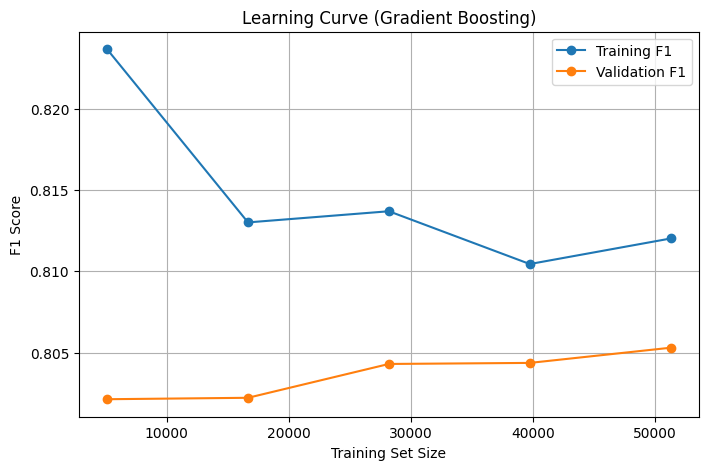

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    final_gb_model,
    X_train,
    y_train,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', label='Training F1')
plt.plot(train_sizes, test_mean, 'o-', label='Validation F1')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.title('Learning Curve (Gradient Boosting)')
plt.legend()
plt.grid(True)
plt.show()


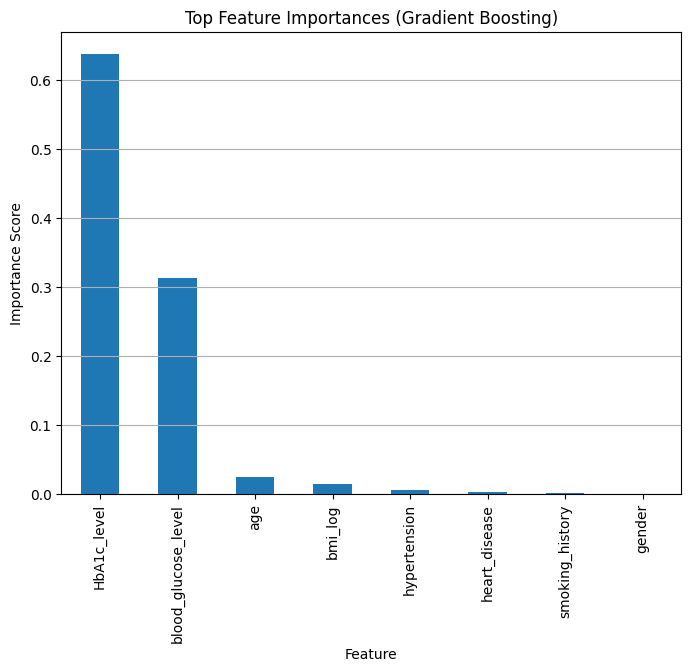

In [54]:
feature_importance = pd.Series(final_gb_model.feature_importances_, index=X_train.columns)

feature_importance = feature_importance.sort_values(ascending=False)

top_features = feature_importance.head(15)

plt.figure(figsize=(8, 6))
top_features.plot(kind='bar')
plt.title("Top Feature Importances (Gradient Boosting)")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.grid(axis='y')
plt.show()


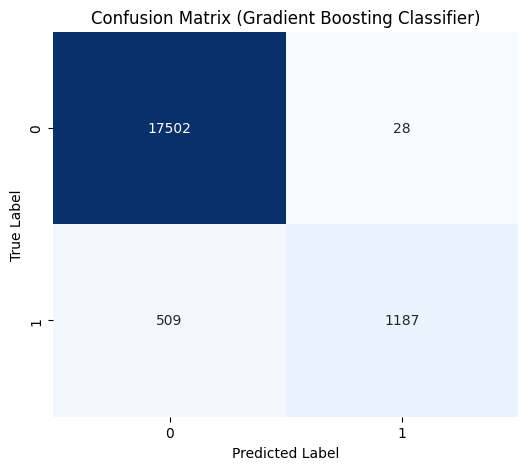

In [55]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Gradient Boosting Classifier)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [56]:
import pickle

In [57]:
filename = 'diabetes_model.sav'
pickle.dump(final_gb_model, open(filename, 'wb'))

In [58]:
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

# **MLflow**

In [82]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)

2025/11/29 00:59:41 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\noura\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/11/29 00:59:50 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\noura\AppData\Lo


--- Experiment_1_GB ---
Accuracy: 0.9715, Precision: 0.9717, Recall: 0.9715, F1: 0.9692, ROC–AUC: 0.9771


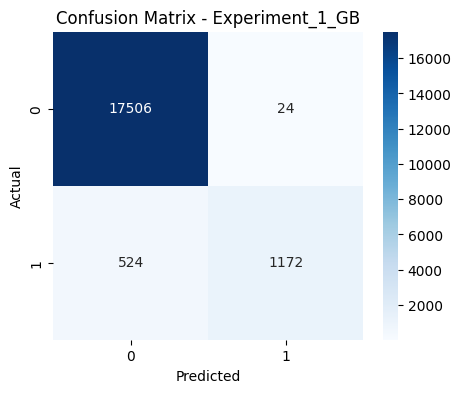

2025/11/29 00:59:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/29 01:00:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow run for Experiment_1_GB completed successfully!


2025/11/29 01:00:02 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\noura\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/11/29 01:00:12 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\noura\AppData\Lo


--- Experiment_2_GB ---
Accuracy: 0.9718, Precision: 0.9719, Recall: 0.9718, F1: 0.9696, ROC–AUC: 0.9776


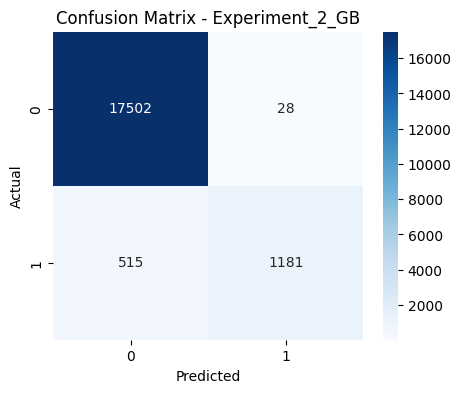

2025/11/29 01:00:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/29 01:00:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow run for Experiment_2_GB completed successfully!


2025/11/29 01:00:23 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\noura\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/11/29 01:00:42 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\noura\AppData\Lo


--- Experiment_3_GB ---
Accuracy: 0.9710, Precision: 0.9707, Recall: 0.9710, F1: 0.9690, ROC–AUC: 0.9773


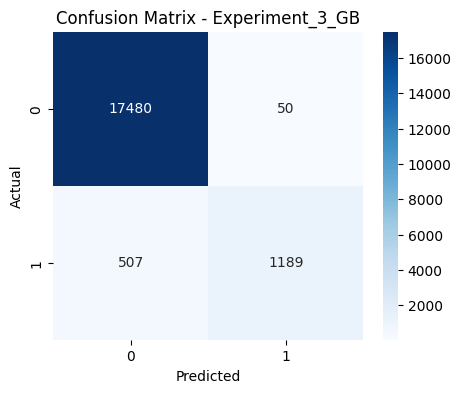

2025/11/29 01:00:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/29 01:00:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow run for Experiment_3_GB completed successfully!


2025/11/29 01:00:54 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\noura\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/11/29 01:01:25 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\noura\AppData\Lo


--- Experiment_4_GB ---
Accuracy: 0.9689, Precision: 0.9680, Recall: 0.9689, F1: 0.9670, ROC–AUC: 0.9759


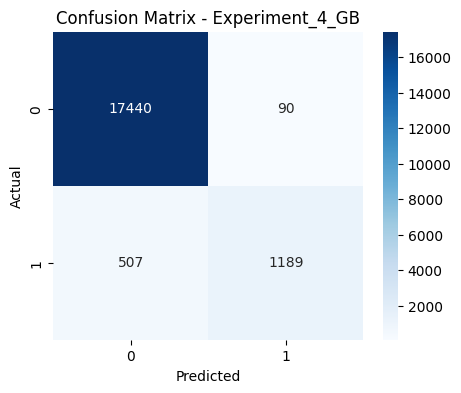

2025/11/29 01:01:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/29 01:01:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow run for Experiment_4_GB completed successfully!


2025/11/29 01:01:38 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\noura\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/11/29 01:02:06 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\noura\AppData\Lo


--- Experiment_5_GB ---
Accuracy: 0.9709, Precision: 0.9706, Recall: 0.9709, F1: 0.9688, ROC–AUC: 0.9770


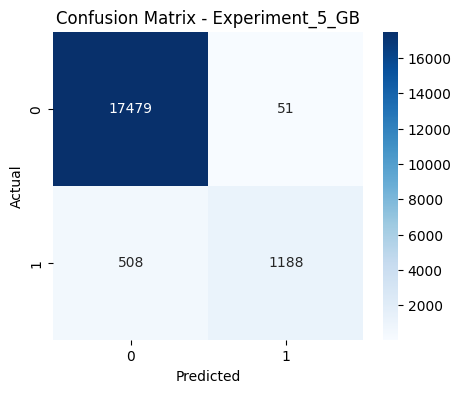

2025/11/29 01:02:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/29 01:02:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow run for Experiment_5_GB completed successfully!


In [83]:

mlflow.set_experiment("GradientBoosting_5_Experiments")

param_list = [
    {"n_estimators": 200, "learning_rate": 0.05, "max_depth": 3},
    {"n_estimators": 300, "learning_rate": 0.08, "max_depth": 2},
    {"n_estimators": 400, "learning_rate": 0.12, "max_depth": 3},
    {"n_estimators": 500, "learning_rate": 0.15, "max_depth": 4},
    {"n_estimators": 600, "learning_rate": 0.10, "max_depth": 3} 
]

for i, params in enumerate(param_list, start=1):

    run_name = f"Experiment_{i}_GB"
    with mlflow.start_run(run_name=run_name):

        
        
        model = GradientBoostingClassifier(
            n_estimators=params["n_estimators"],
            learning_rate=params["learning_rate"],
            max_depth=params["max_depth"],
            random_state=42
        )

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted')
        rec = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        roc_auc = roc_auc_score(y_test, y_prob)

        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("precision", prec)
        mlflow.log_metric("recall", rec)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_metric("roc_auc", roc_auc)

        
        print(f"\n--- {run_name} ---")
        print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, ROC–AUC: {roc_auc:.4f}")

        cm = confusion_matrix(y_test, y_pred)
        os.makedirs("metrics", exist_ok=True)
        cm_path = f"metrics/confusion_matrix_exp{i}.png"

        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(f"Confusion Matrix - {run_name}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()           
        plt.savefig(cm_path)    
        plt.close()

        mlflow.log_artifact(cm_path)

        mlflow.sklearn.log_model(model, f"trained_model_exp{i}")

        print(f"MLflow run for {run_name} completed successfully!")

        

2025/11/29 01:02:20 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\noura\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/11/29 01:02:22 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\noura\AppData\Lo


--- Experiment_1_RF ---
Accuracy: 0.9718, Precision: 0.9726, Recall: 0.9718, F1: 0.9693, ROC–AUC: 0.9521


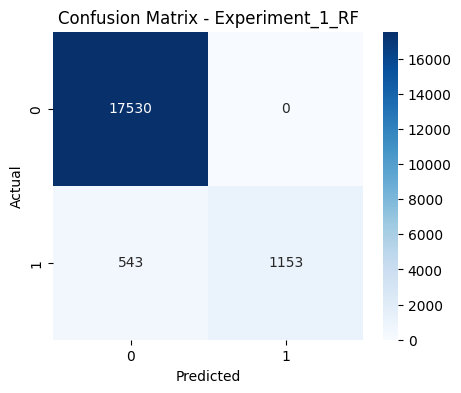

2025/11/29 01:02:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/29 01:02:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow run for Experiment_1_RF completed successfully!


2025/11/29 01:02:34 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\noura\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/11/29 01:02:39 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\noura\AppData\Lo


--- Experiment_2_RF ---
Accuracy: 0.9718, Precision: 0.9726, Recall: 0.9718, F1: 0.9693, ROC–AUC: 0.9636


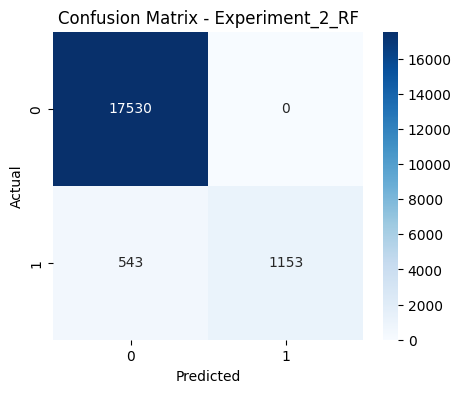

2025/11/29 01:02:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/29 01:02:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow run for Experiment_2_RF completed successfully!


2025/11/29 01:02:53 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\noura\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/11/29 01:03:00 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\noura\AppData\Lo


--- Experiment_3_RF ---
Accuracy: 0.9718, Precision: 0.9726, Recall: 0.9718, F1: 0.9693, ROC–AUC: 0.9597


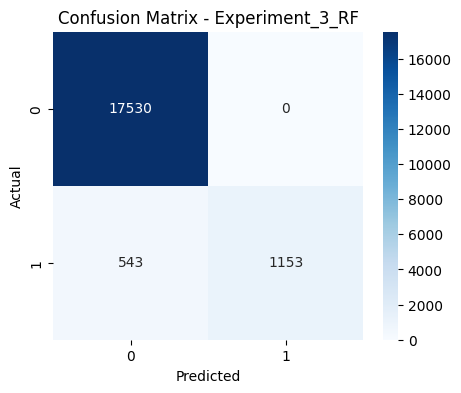

2025/11/29 01:03:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/29 01:03:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow run for Experiment_3_RF completed successfully!


2025/11/29 01:03:16 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\noura\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/11/29 01:03:25 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\noura\AppData\Lo


--- Experiment_4_RF ---
Accuracy: 0.9718, Precision: 0.9726, Recall: 0.9718, F1: 0.9693, ROC–AUC: 0.9671


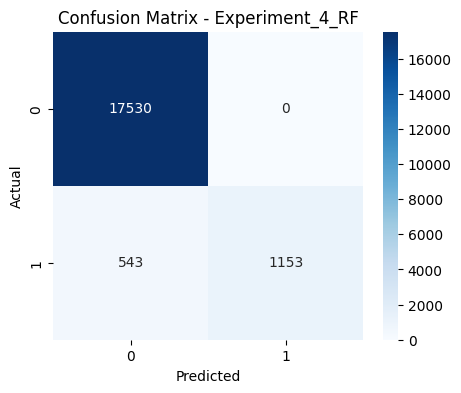

2025/11/29 01:03:40 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/29 01:03:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow run for Experiment_4_RF completed successfully!


2025/11/29 01:03:45 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\noura\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/11/29 01:03:59 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\noura\AppData\Lo


--- Experiment_5_RF ---
Accuracy: 0.9718, Precision: 0.9726, Recall: 0.9718, F1: 0.9693, ROC–AUC: 0.9707


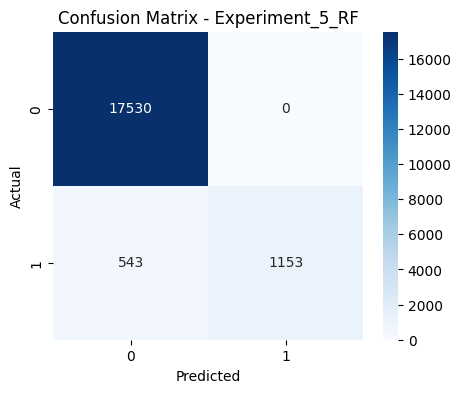

2025/11/29 01:04:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/29 01:04:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow run for Experiment_5_RF completed successfully!


In [84]:
mlflow.set_experiment("RandomForest_5_Experiments")

param_list = [
    {"n_estimators": 100, "max_depth": 5, "min_samples_split": 2},
    {"n_estimators": 200, "max_depth": 7, "min_samples_split": 4},
    {"n_estimators": 300, "max_depth": 6, "min_samples_split": 3},
    {"n_estimators": 400, "max_depth": 8, "min_samples_split": 2},
    {"n_estimators": 500, "max_depth": 10, "min_samples_split": 5}
]

for i, params in enumerate(param_list, start=1):

    run_name = f"Experiment_{i}_RF"
    with mlflow.start_run(run_name=run_name):

    
        
        model = RandomForestClassifier(
            n_estimators=params["n_estimators"],
            max_depth=params["max_depth"],
            min_samples_split=params["min_samples_split"],
            random_state=42
        )
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted')
        rec = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        roc_auc = roc_auc_score(y_test, y_prob)

        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("precision", prec)
        mlflow.log_metric("recall", rec)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_metric("roc_auc", roc_auc)


        
        print(f"\n--- {run_name} ---")
        print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, ROC–AUC: {roc_auc:.4f}")

        cm = confusion_matrix(y_test, y_pred)
        os.makedirs("metrics", exist_ok=True)
        cm_path = f"metrics/confusion_matrix_exp{i}.png"

        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(f"Confusion Matrix - {run_name}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()               
        plt.savefig(cm_path)     
        plt.close()

        mlflow.log_artifact(cm_path)

        mlflow.sklearn.log_model(model, f"trained_model_exp{i}")

        print(f"MLflow run for {run_name} completed successfully!")

In [ ]:
!pip install optuna
import optuna


def objective(trial):

    n_estimators = trial.suggest_int("n_estimators", 200, 400)
    learning_rate = trial.suggest_float("learning_rate", 0.05, 0.12)
    max_depth = trial.suggest_int("max_depth", 2, 3)

    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=42
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    f1 = f1_score(y_test, y_pred, average='weighted')
    return f1  


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  

print("Best trial:")
trial = study.best_trial
print(f"  F1 Score: {trial.value:.4f}")
print("  Params:")
for key, value in trial.params.items():
    print(f"    {key}: {value}")



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
[I 2025-11-29 01:04:24,981] A new study created in memory with name: no-name-08f2deb1-4a18-4d68-b394-6767875fa50d
2025/11/29 01:04:25 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'a730a1674baf41ddae1a62c6b7e18906', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


2025/11/29 01:04:25 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\noura\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/11/29 01:04:42 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\noura\AppData\Lo

In [ ]:
y_train_pred = best_gb_model.predict(X_train)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

y_test_pred = best_gb_model.predict(X_test)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("F1 on Train:", train_f1)
print("F1 on Test:", test_f1)


F1 on Train: 0.9696423504155909
F1 on Test: 0.9696654457336744
